In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
#Loading the dataset
df = pd.read_csv('../US_Accidents/US_Accidents_June20.csv')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
#Length of the dataset
len(df)

3513617

In [4]:
#Checking the type of variable of each column
df.dtypes

ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitat

In [5]:
columns = df.columns
print(columns)

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [6]:
#Check the percentage of missing values in each column
for column in columns:
    print(column)
    print(df[column].isna().mean())
    print()

ID
0.0

Source
0.0

TMC
0.29451104090172603

Severity
0.0

Start_Time
0.0

End_Time
0.0

Start_Lat
0.0

Start_Lng
0.0

End_Lat
0.7054889590982739

End_Lng
0.7054889590982739

Distance(mi)
0.0

Description
2.84607001844538e-07

Number
0.6440269386219386

Street
0.0

Side
0.0

City
3.187598420658825e-05

County
0.0

State
0.0

Zipcode
0.0003042448849718111

Country
0.0

Timezone
0.0011042751671568073

Airport_Code
0.0019233741184653877

Weather_Timestamp
0.01233002914091092

Temperature(F)
0.01870778744524517

Wind_Chill(F)
0.5317167465890562

Humidity(%)
0.01983340813754032

Pressure(in)
0.01590440847707647

Visibility(mi)
0.021589148731919274

Wind_Direction
0.01675595262659533

Wind_Speed(mph)
0.12938490450154358

Precipitation(in)
0.5765779252548016

Weather_Condition
0.021669407906439432

Amenity
0.0

Bump
0.0

Crossing
0.0

Give_Way
0.0

Junction
0.0

No_Exit
0.0

Railway
0.0

Roundabout
0.0

Station
0.0

Stop
0.0

Traffic_Calming
0.0

Traffic_Signal
0.0

Turning_Loop
0.0

Sunrise_

In [10]:
df_2 = df[['Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']]
proximity = df_2.sum(axis=0)

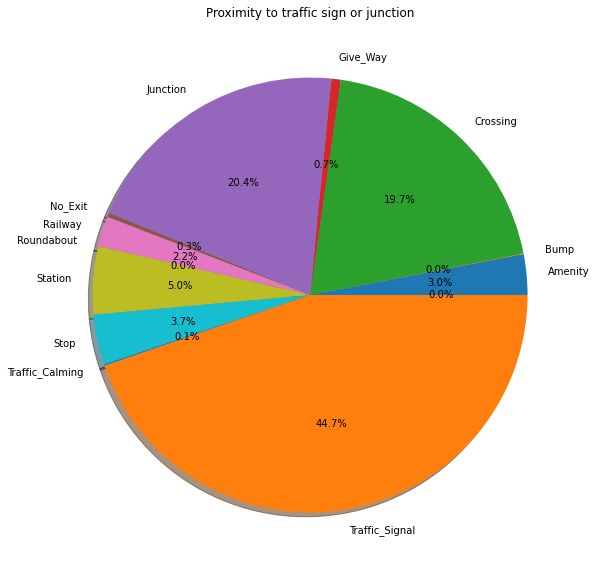

In [11]:
proximity.plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,10))
plt.ylabel('')
plt.title('Proximity to traffic sign or junction');

In [ ]:
#Most of the accidents happen near a junction, a crossing or a traffic_signal


In [8]:
#As we can check in the cell above, many columns have missing values
#Some of them are TMC,End_Lng, End_Lat, Number and other variables related to weather conditions

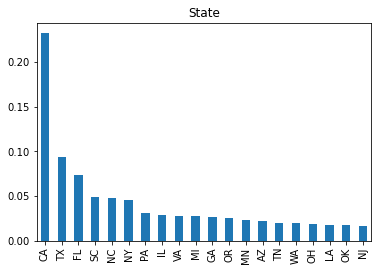

In [9]:
#Counting the number of accidents in each state
count_vals = df.State.value_counts()

# The below should be a bar chart of the proportion of the top 10 countries for the
# individuals in your count_vals if it is set up correctly.

(count_vals[:20]/df.shape[0]).plot(kind="bar");
plt.title("State");

In [14]:
print(count_vals[0]/df.shape[0])
print(count_vals[1]/df.shape[0])
print(count_vals[2]/df.shape[0])
print(count_vals[3]/df.shape[0])
print(count_vals[4]/df.shape[0])
print(count_vals[5]/df.shape[0])

0.23247411428166473
0.09371653199537684
0.07342917568989449
0.04931584745861601
0.047232808812115834
0.045769644215633065


In [ ]:
#California is by far, the state where most accident happen. 23.2% of all accidents happened there
#Other relevant states are Texas with 9%, Florida with 7%, Sacramento, North Carolina and New York with 5 

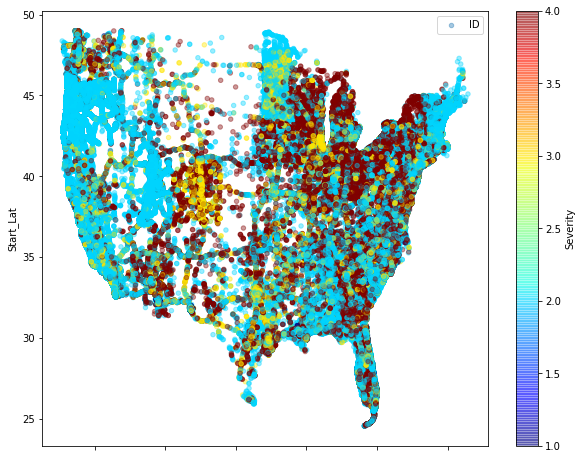

In [8]:
mapping_accidents=df.plot(kind='scatter', x='Start_Lng', y='Start_Lat',label = 'ID',c='Severity',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
mapping_accidents.legend()

In [28]:
#Average Severity per state
state_severity = df.groupby(['State']).mean()['Severity']
top_10 = state_severity.nlargest(10)
print(top_10)

State
SD    3.311475
WY    3.125984
ND    2.772727
AR    2.736083
MT    2.693359
GA    2.655126
IA    2.635817
MO    2.633891
WI    2.630467
CT    2.621598
Name: Severity, dtype: float64


In [ ]:
#Ir buscar numero de acidentes de estes estados...Interessante
state_severity = df.groupby(['State']).mean()['Severity']
top_10 = state_severity.nlargest(10)

In [ ]:
#The States with the highest average severity are not the States with the most accidents

Text(0.5, 1.0, 'Average State Severity')

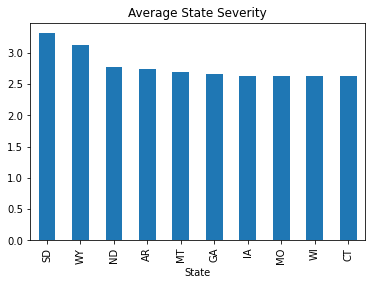

In [29]:
top_10.plot(kind="bar");
plt.title("Average State Severity")

In [33]:
#top_10_maf = df.

#Counting the states with the most severe accidents

#state_severity_3_4 = df.query("(Severity == '3' or Severity == '4')").groupby(['State'].va)

#print(state_severity_3_4)

# The below should be a bar chart of the proportion of the top 10 countries for the
# individuals in your count_vals if it is set up correctly.

#(count_vals[:20]/df.shape[0]).plot(kind="bar");
#plt.title("State");

In [ ]:
#df.